In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
names_hTERT = [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]

names_PDL = [
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [5]:
dataset = pd.read_csv('Ranked.tsv',sep='\t')
dataset.head()

chrom    start      end  hTERT-TP2-R1  hTERT-TP4-R1-1  hTERT-TP4-R1-2  \
0  chr1        0   250000           NaN             NaN             NaN   
1  chr1   250000   500000           NaN             NaN             NaN   
2  chr1   500000   750000           NaN             NaN             NaN   
3  chr1   750000  1000000           NaN             NaN           110.0   
4  chr1  1000000  1250000          32.0            80.0            79.0   

   hTERT-TP5-R1  hTERT-TP6-R1  PDL25-TP2-R1  PDL33-TP4-R1  PDL37-TP5-R1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN          97.0           NaN           NaN   
4          19.0          44.0          92.0          73.0          91.0   

   PDL46-TP6-R1  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

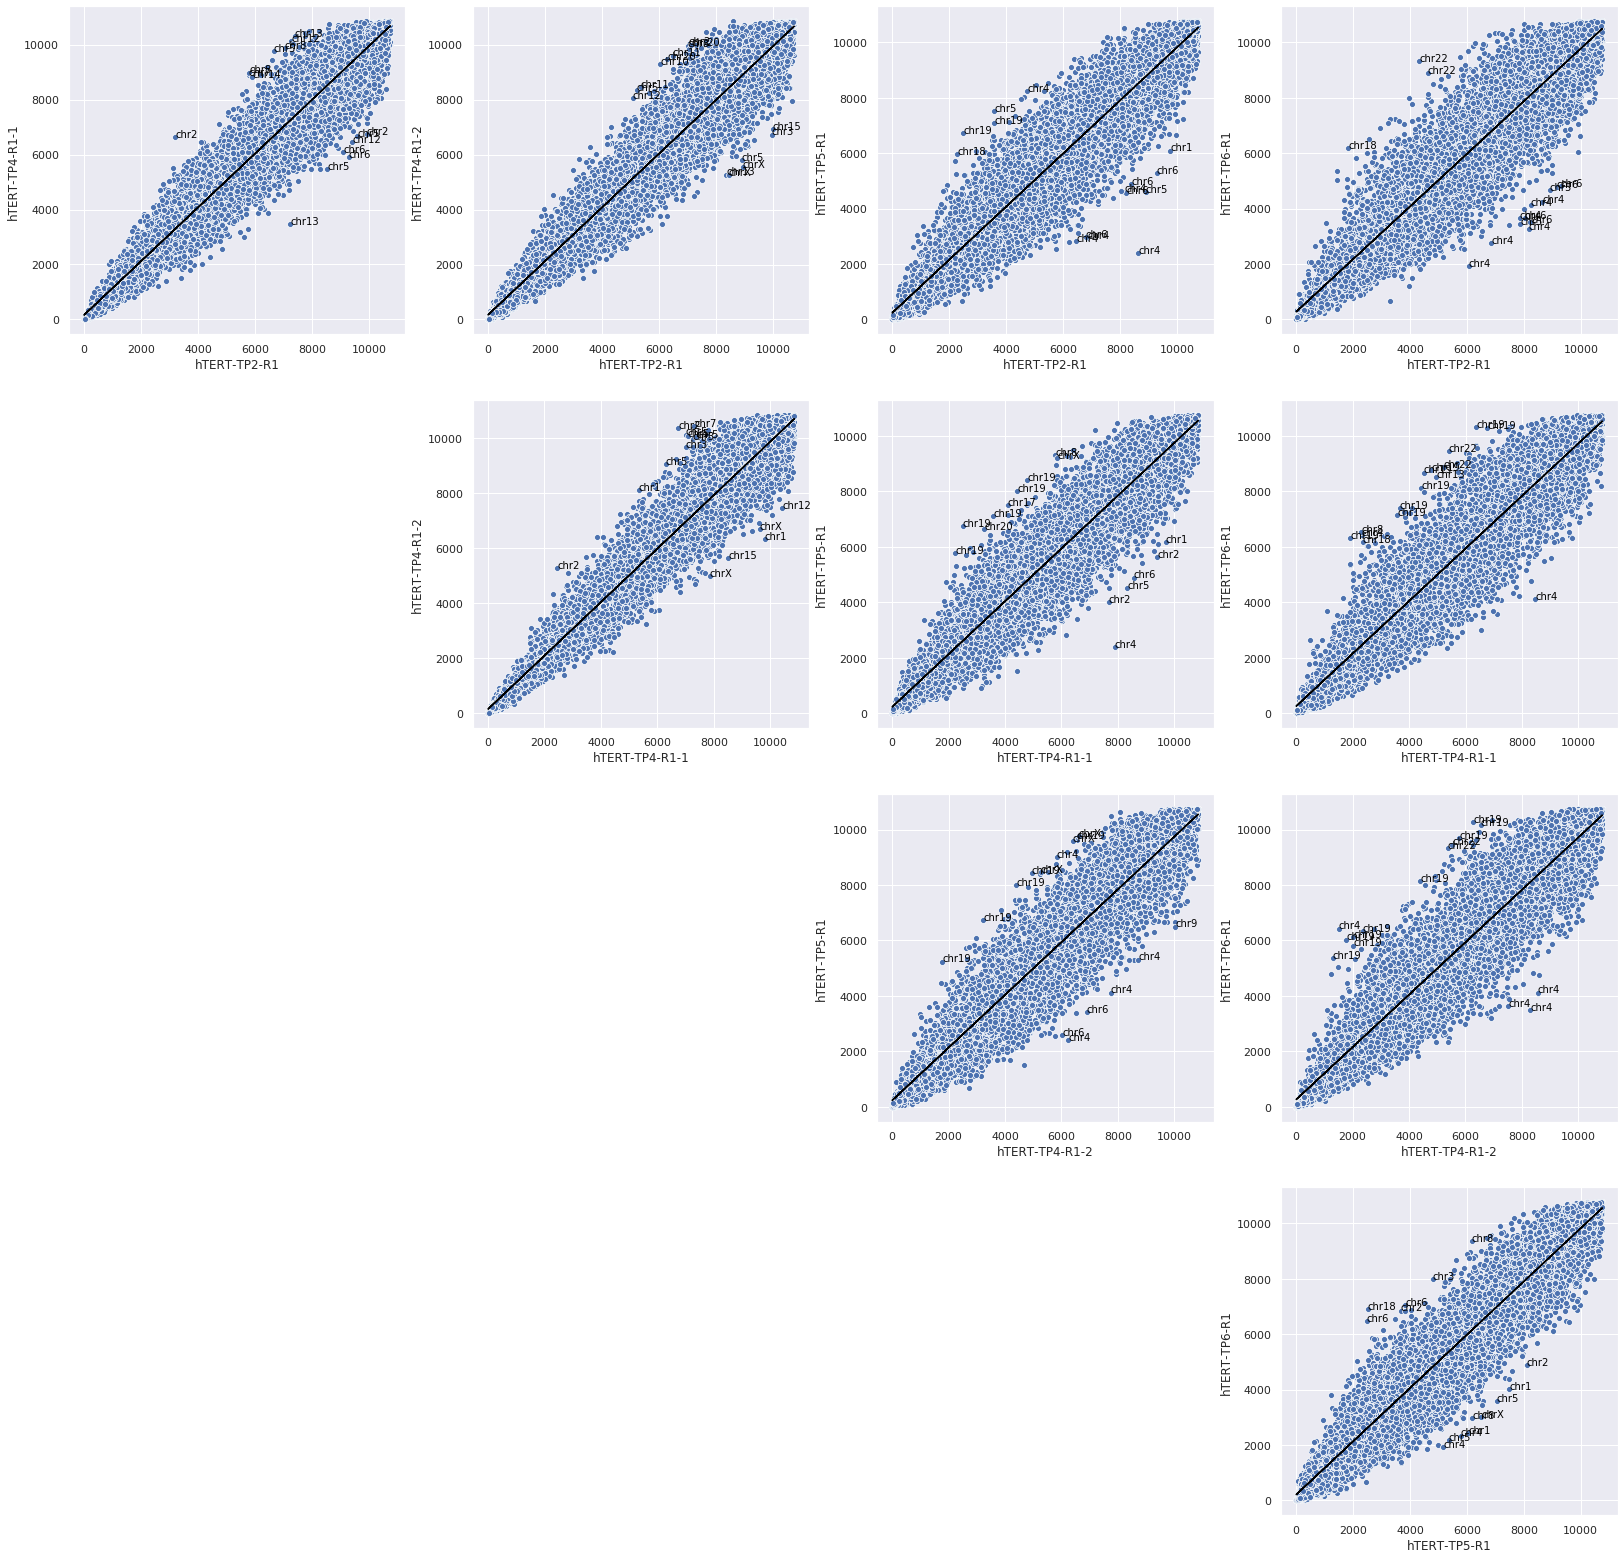

In [7]:
#hTERTS
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=5, ncols=5)
for i in range(5):
    for j in range(i+1,5):
        #linear reg
        regressor = LinearRegression()
        df=dataset[['chrom','start','end',names_hTERT[i],names_hTERT[j]]].dropna()
        X=df[names_hTERT[i]].values.reshape(-1,1)
        y=df[names_hTERT[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        #calculatin perpendicular distances
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c #predicted y values
        sorteddf.to_csv("Perpendicular-dist/"+names_hTERT[i]+names_hTERT[j]+'.tsv',index=False,sep='\t')
        
        #plotting
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[i],y=names_hTERT[j],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

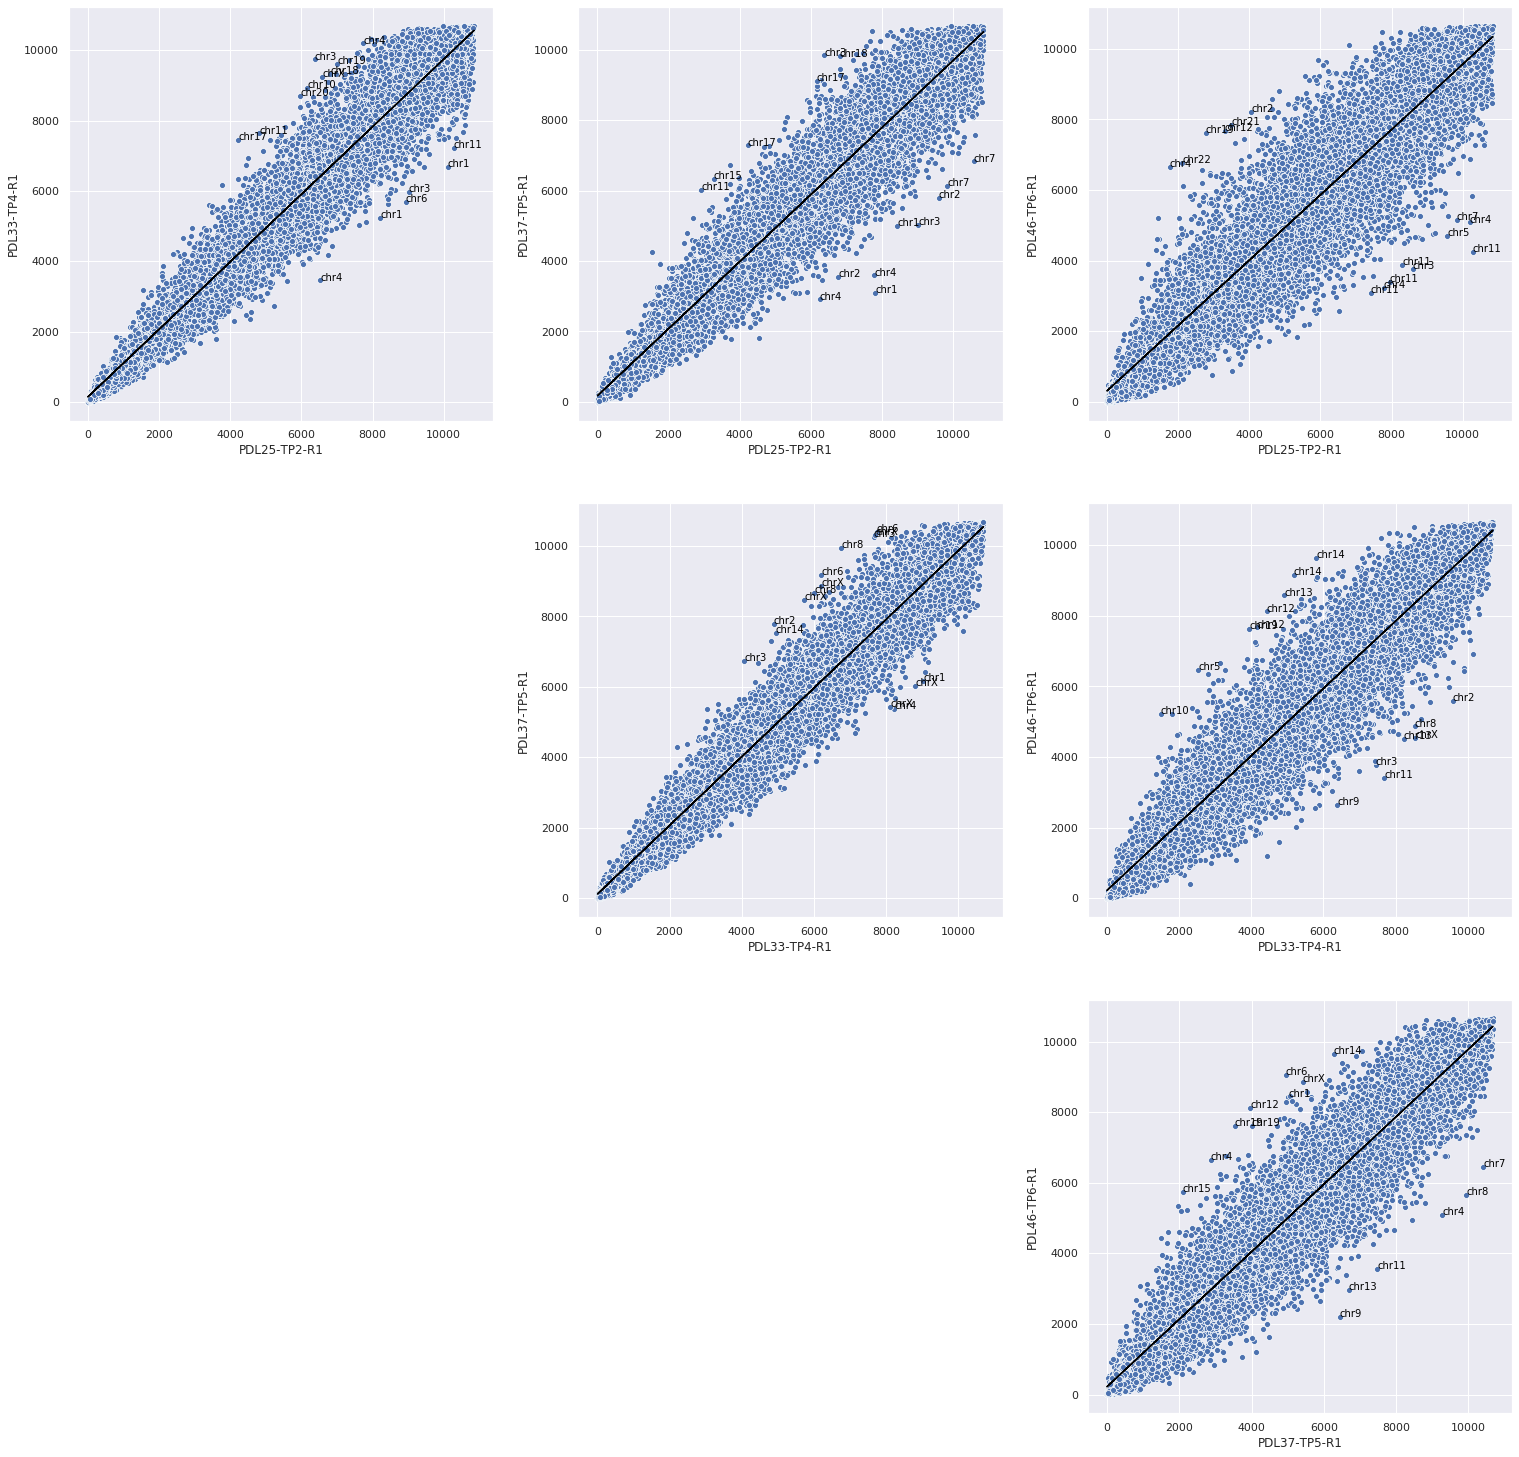

In [8]:
#PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=4)
for i in range(4):
    for j in range(i+1,4):
        df=dataset[['chrom','start','end',names_PDL[i],names_PDL[j]]].dropna()
        X=df[names_PDL[i]].values.reshape(-1,1)
        y=df[names_PDL[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        sorteddf.to_csv("Perpendicular-dist/"+names_PDL[i]+names_PDL[j]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_PDL[i],y=names_PDL[j],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

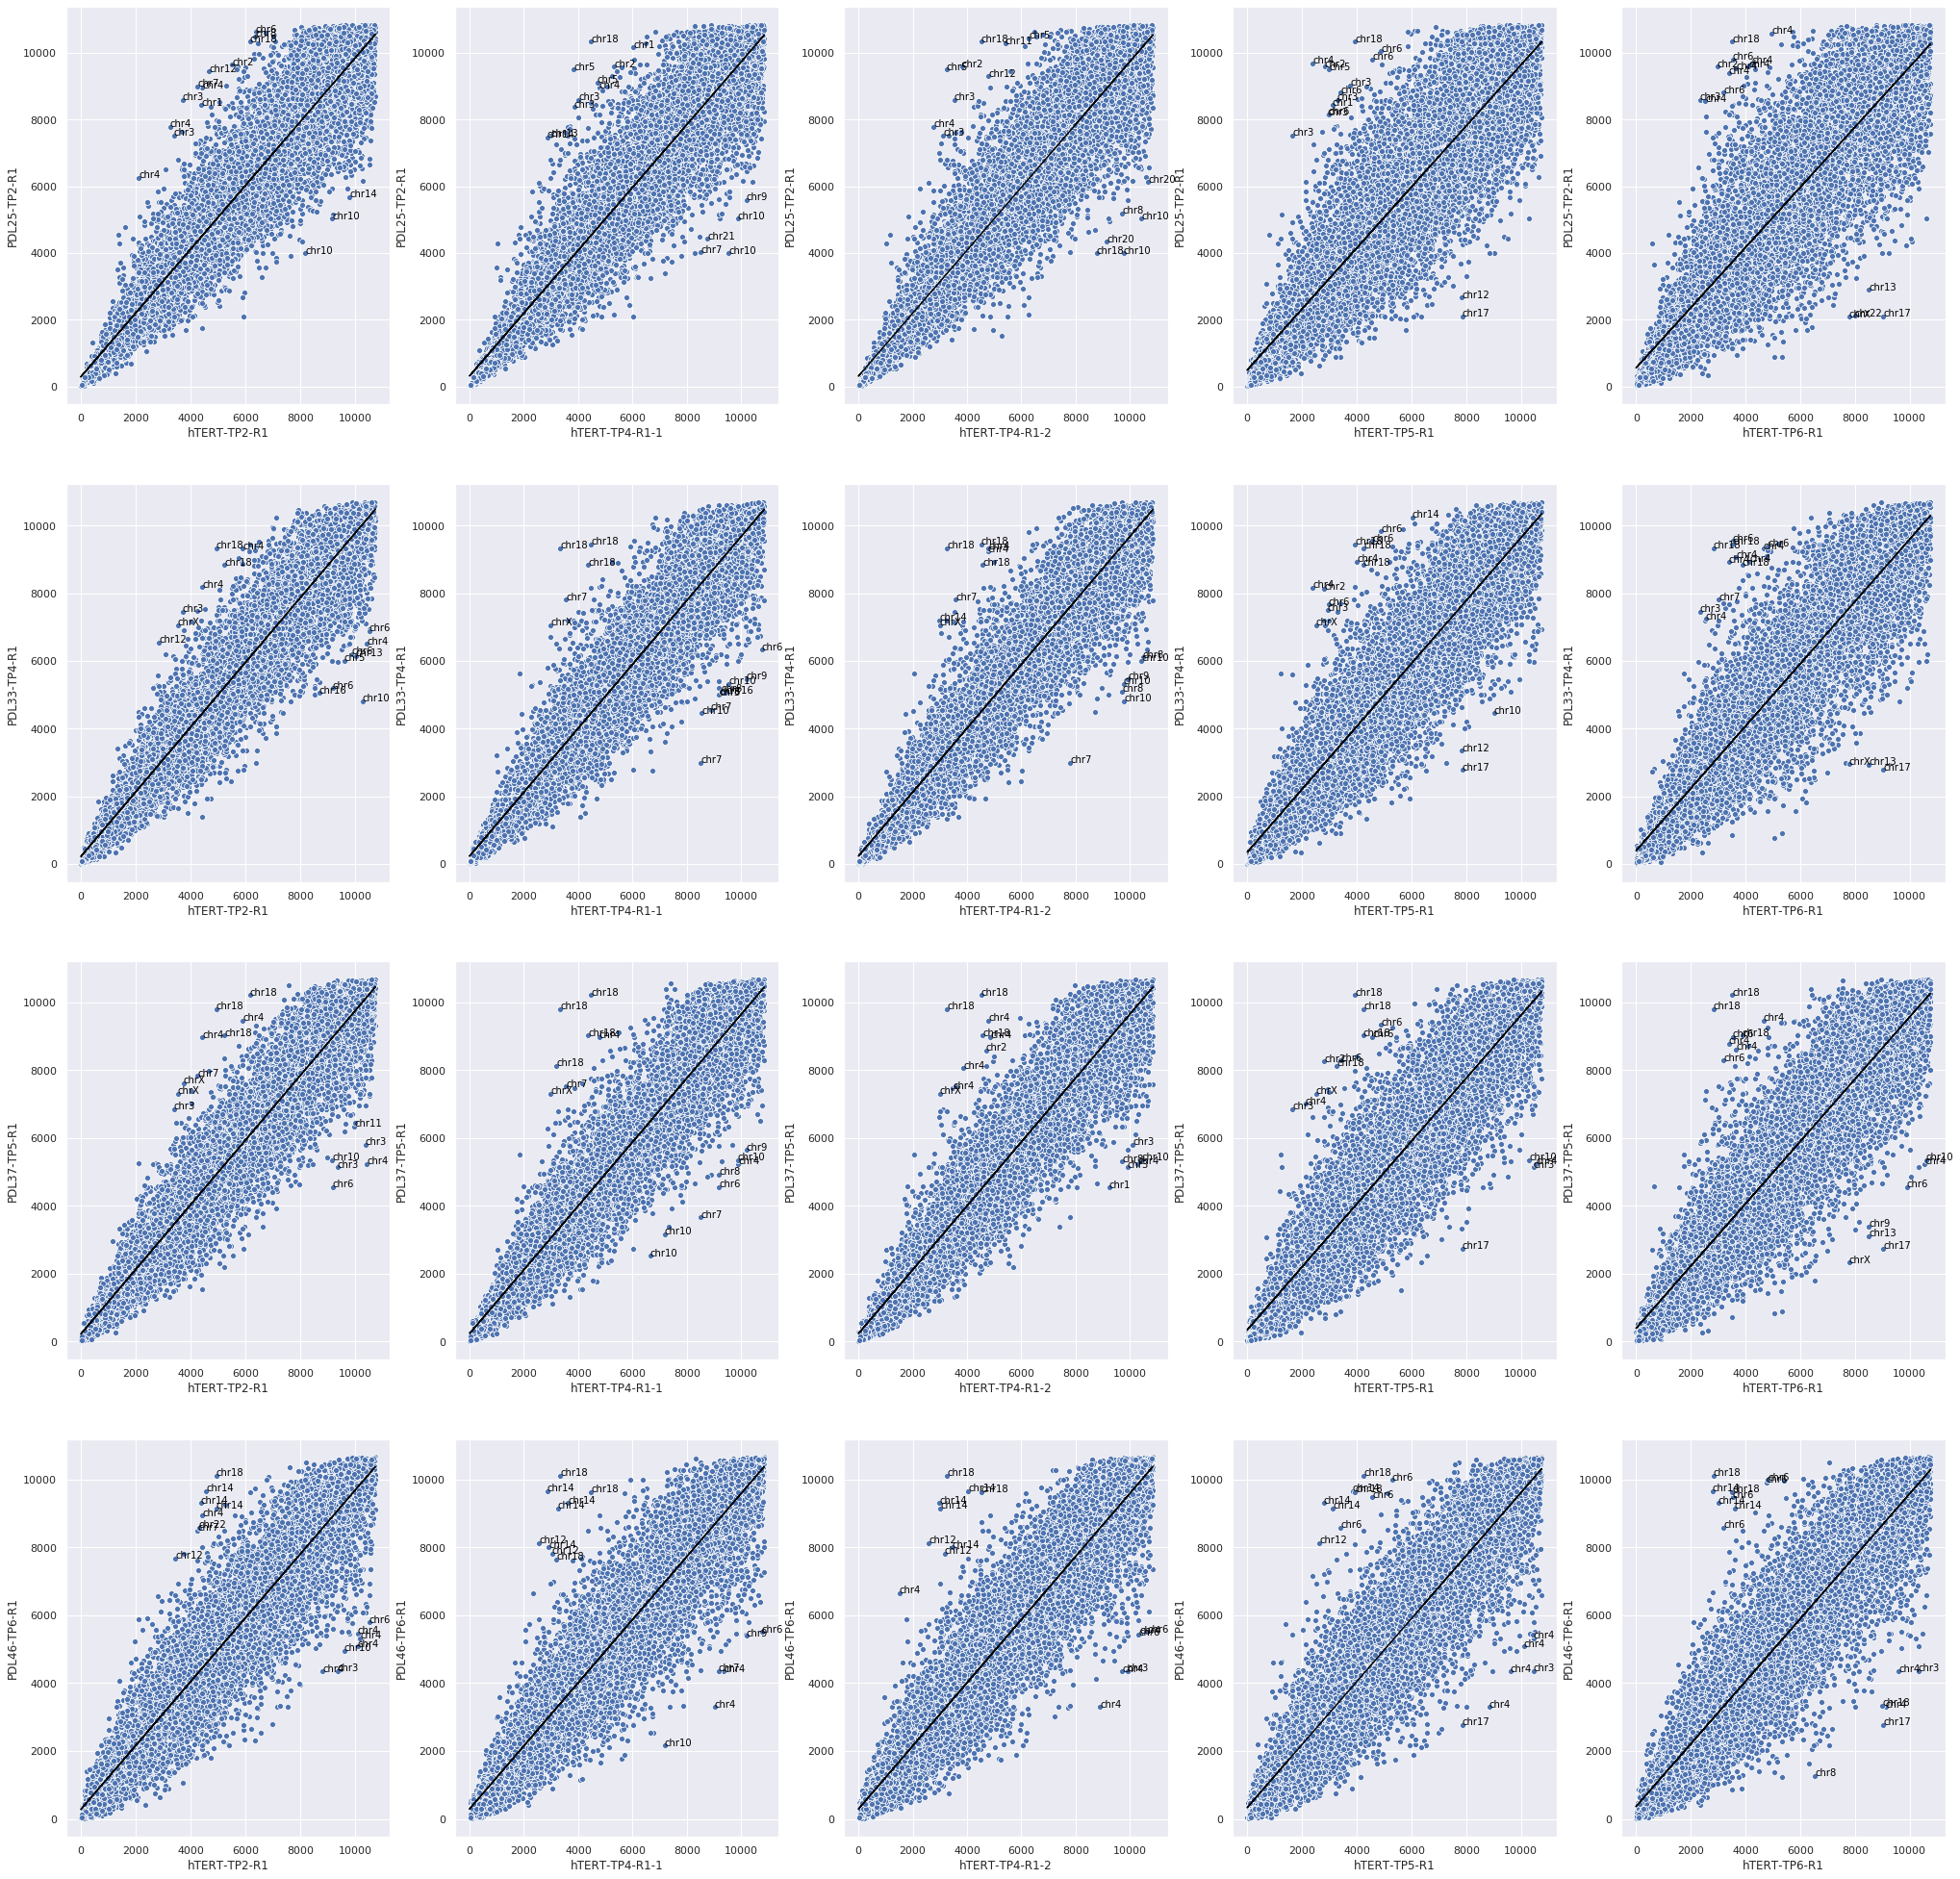

In [9]:
#hTERT-PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=5)
for i in range(4):
    for j in range(5):
        df=dataset[['chrom','start','end',names_hTERT[j],names_PDL[i]]].dropna()
        X=df[names_hTERT[j]].values.reshape(-1,1)
        y=df[names_PDL[i]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        sorteddf.to_csv("Perpendicular-dist/"+names_hTERT[j]+names_PDL[i]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i,j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[j],y=names_PDL[i],data=dataset)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(int(sorteddf.iloc[c,3]),int(sorteddf.iloc[c,4]),sorteddf.iloc[c,0], color='black', size='small')

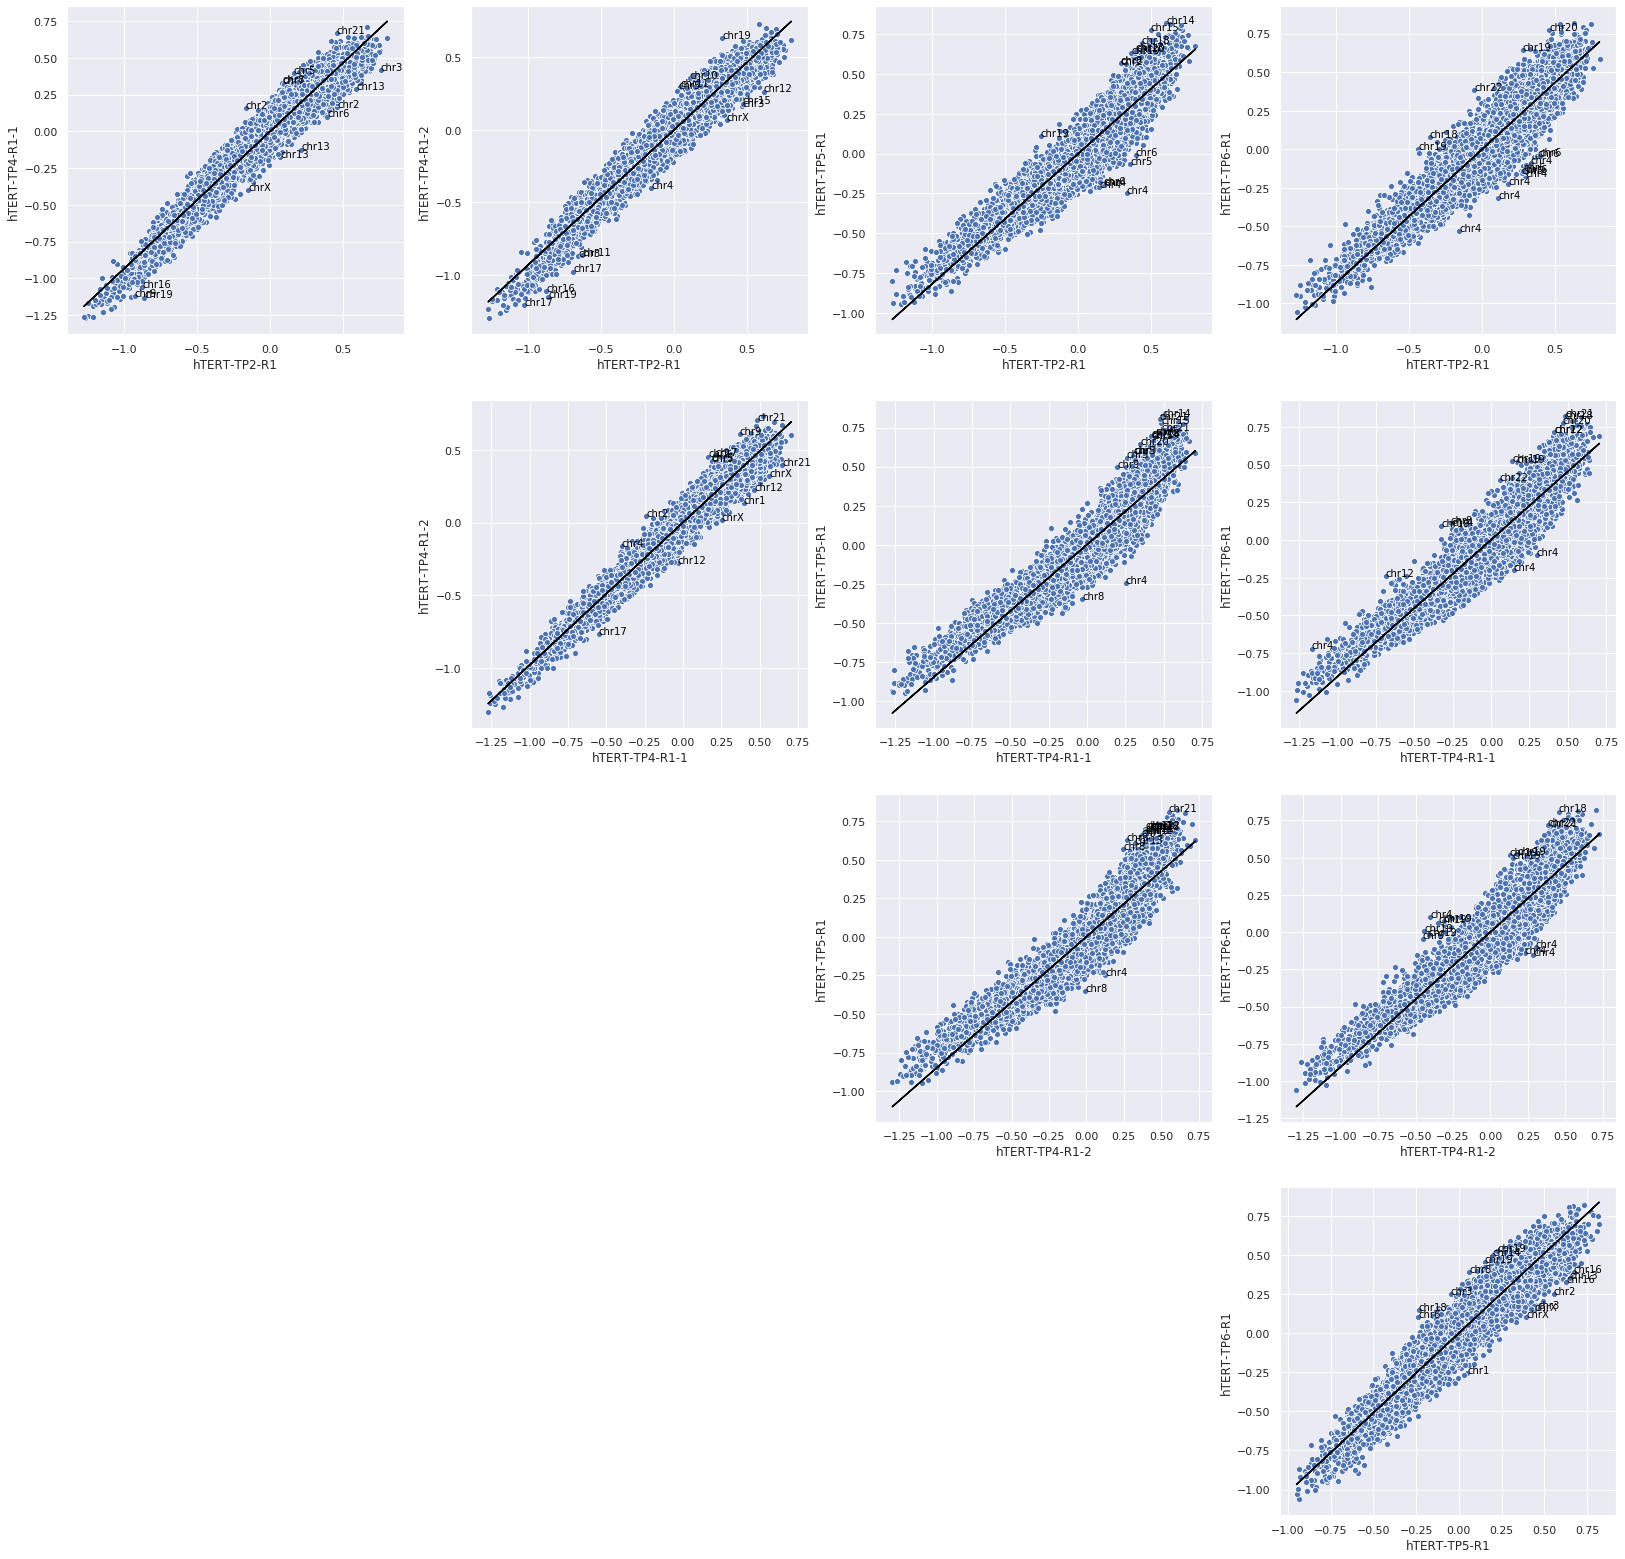

In [11]:
data1 = pd.read_csv('Original.tsv',sep='\t')
data1.head()
#hTERTS
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=5, ncols=5)
for i in range(5):
    for j in range(i+1,5):
        #linear reg
        regressor = LinearRegression()
        df=data1[['chrom','start','end',names_hTERT[i],names_hTERT[j]]].dropna()
        X=df[names_hTERT[i]].values.reshape(-1,1)
        y=df[names_hTERT[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
      
        #calculatin perpendicular distances
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c #predicted y values
        sorteddf.to_csv("Perpendicular-dist/"+names_hTERT[i]+names_hTERT[j]+'.tsv',index=False,sep='\t')
        
        #plotting
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[i],y=names_hTERT[j],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')


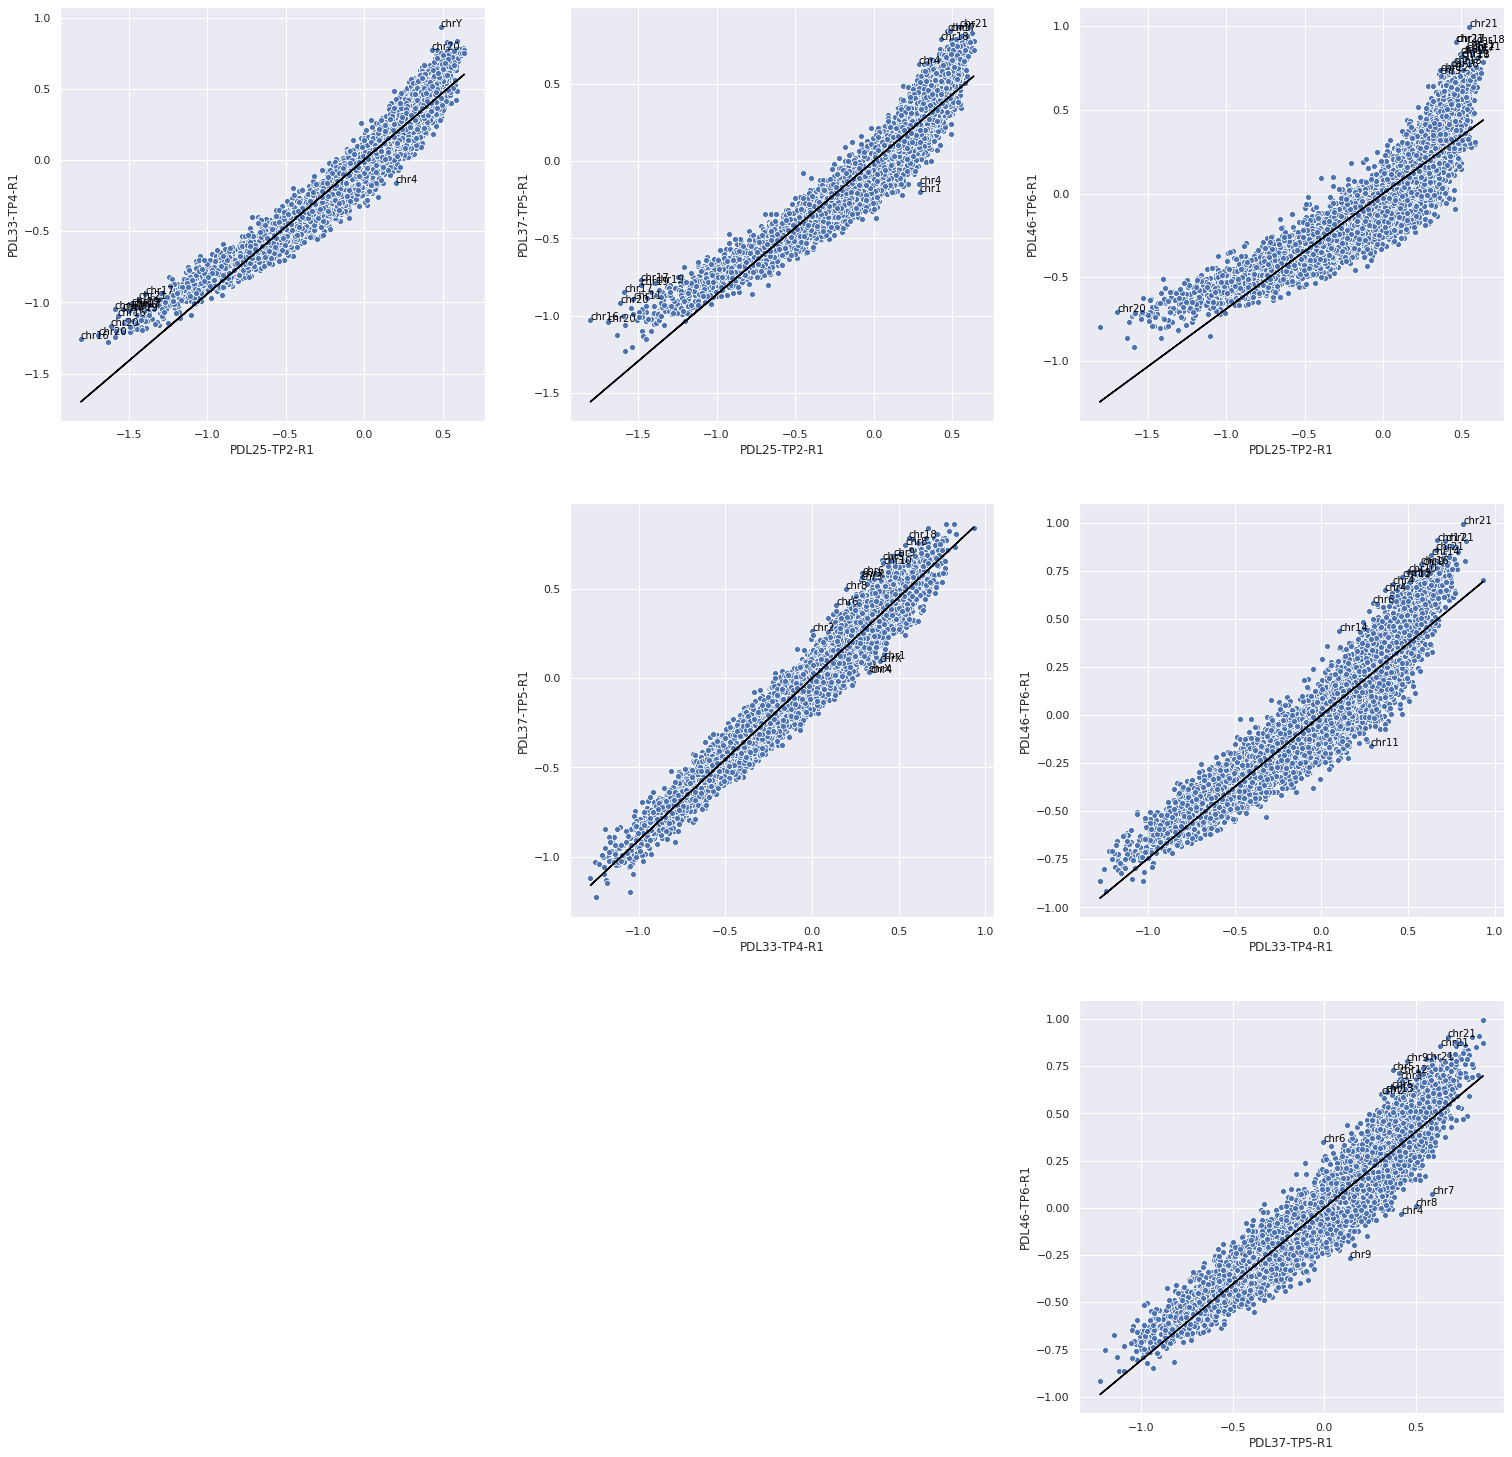

In [12]:
#PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=4)
for i in range(4):
    for j in range(i+1,4):
        df=data1[['chrom','start','end',names_PDL[i],names_PDL[j]]].dropna()
        X=df[names_PDL[i]].values.reshape(-1,1)
        y=df[names_PDL[j]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        sorteddf.to_csv("Perpendicular-dist/"+names_PDL[i]+names_PDL[j]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i, j])
        sns.set()
        p=sns.scatterplot(x=names_PDL[i],y=names_PDL[j],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')

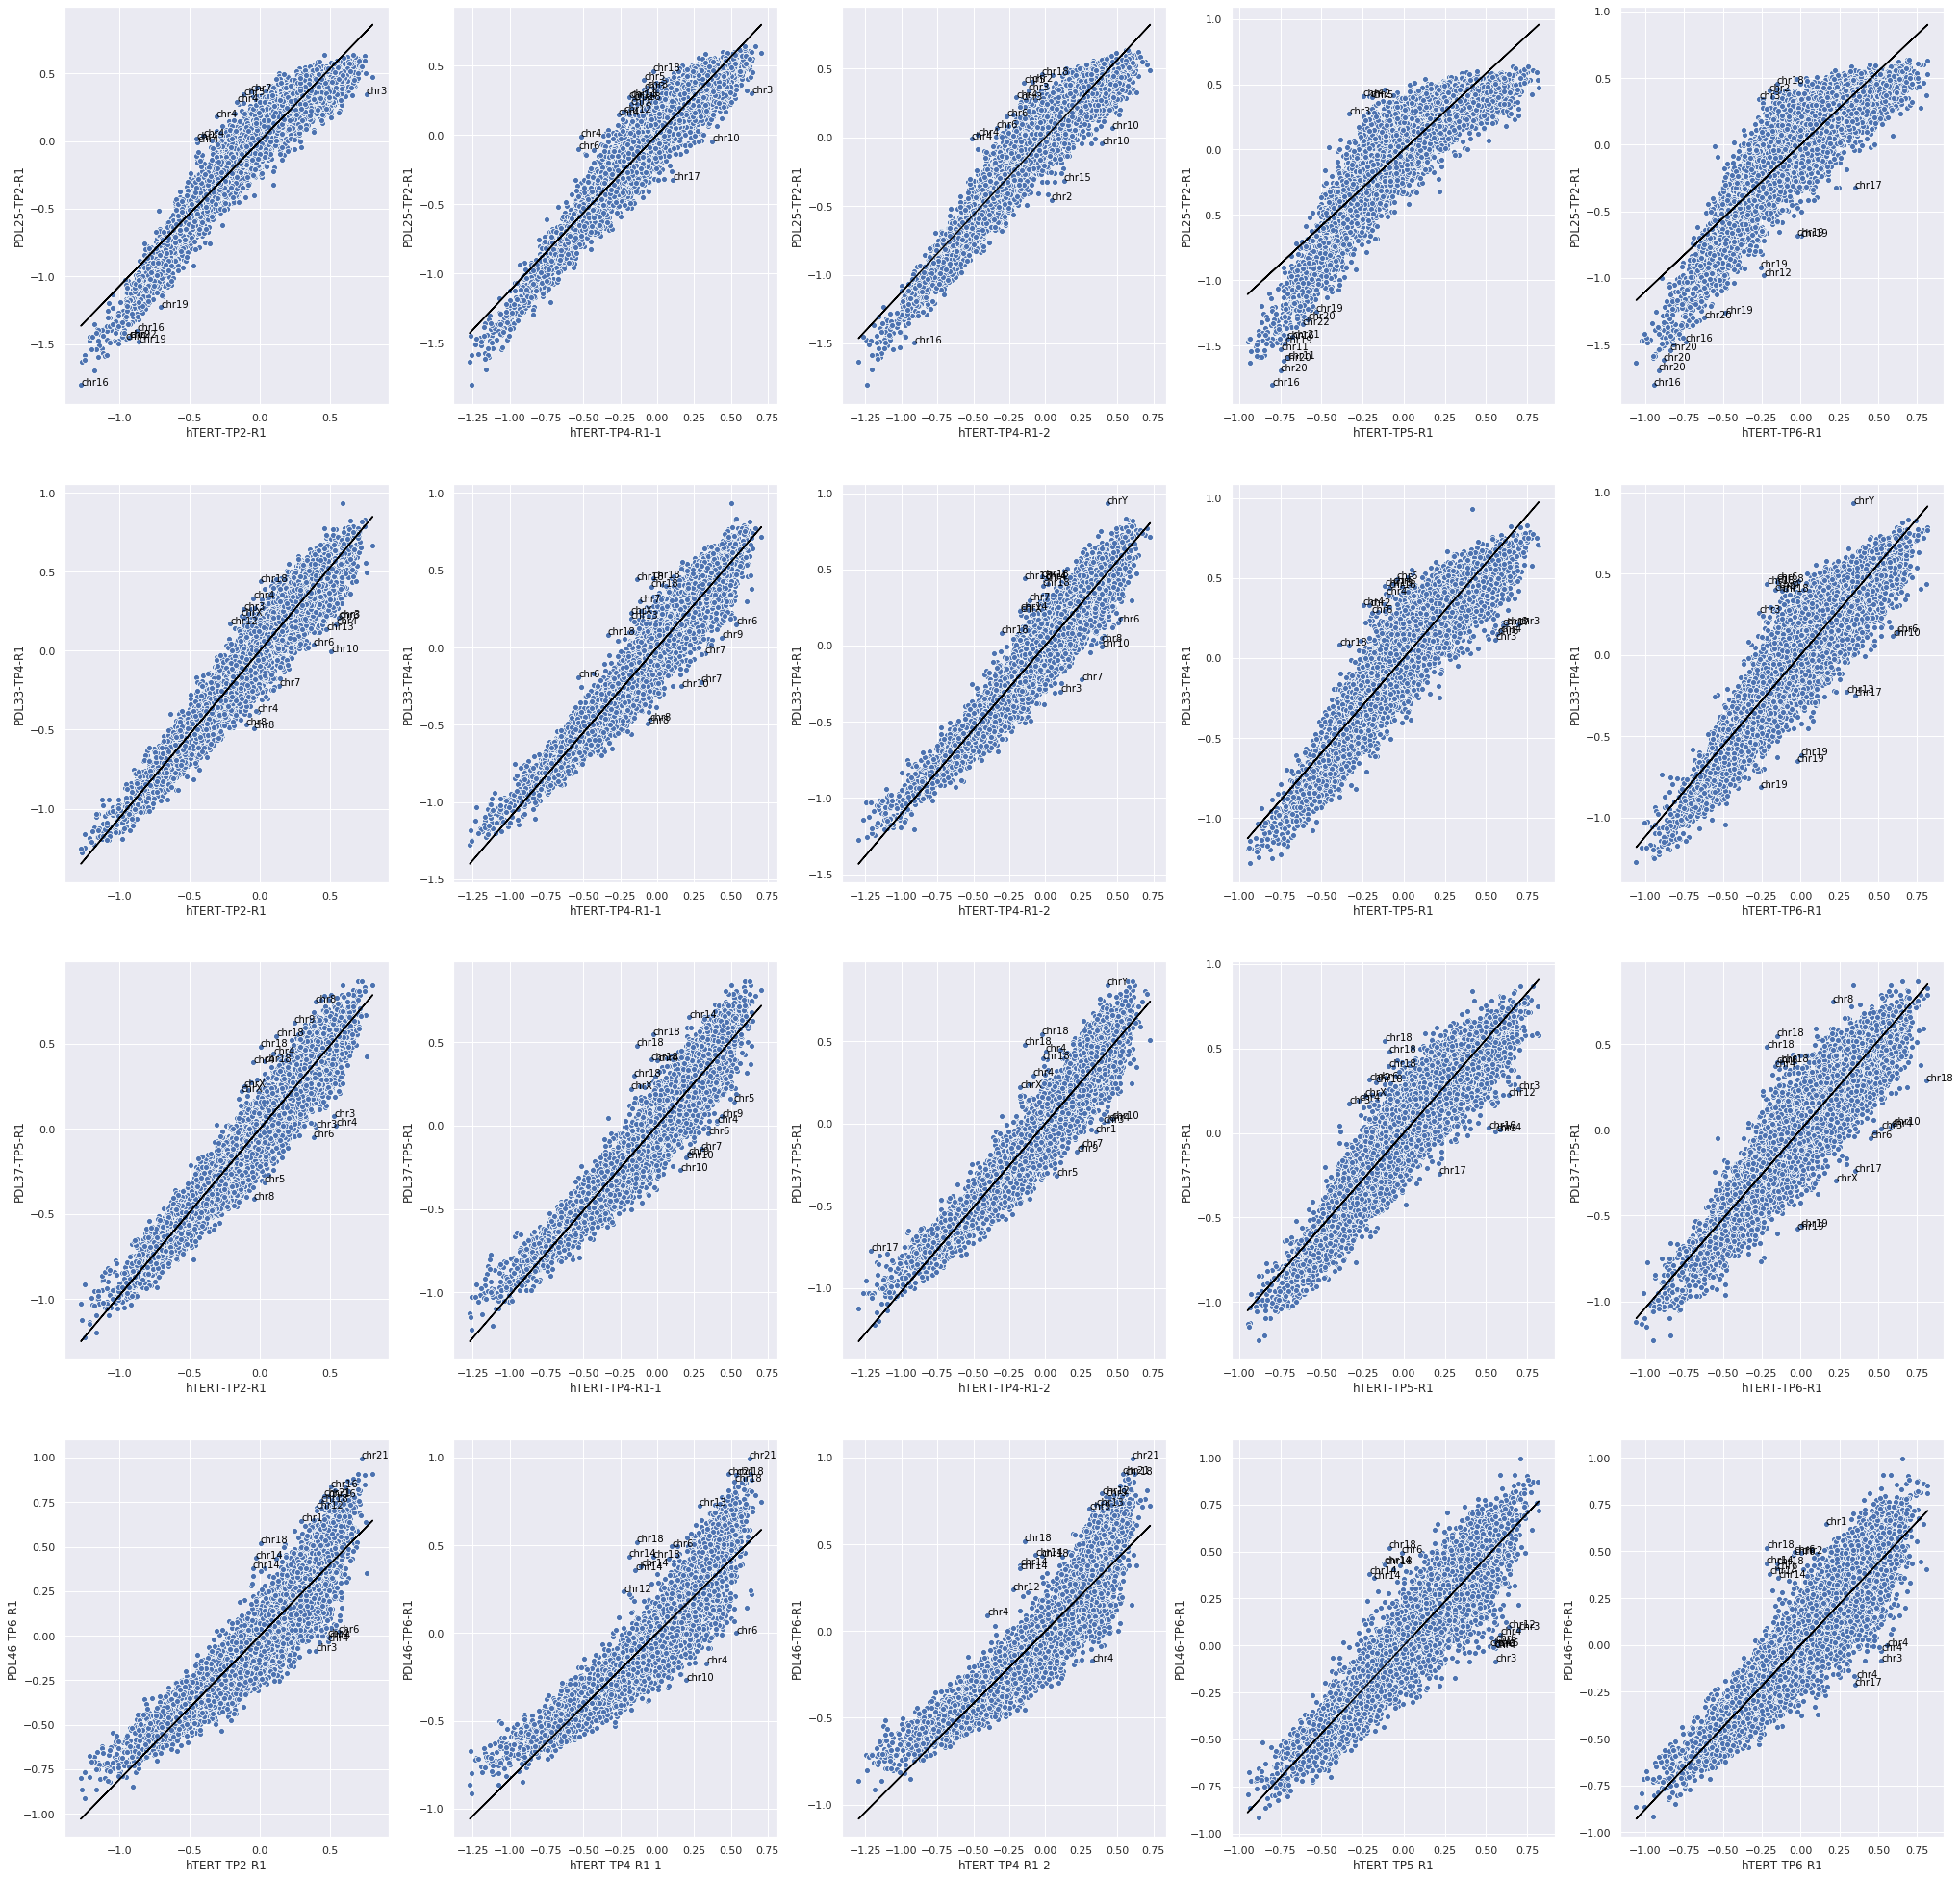

In [13]:
#hTERT-PDL
fig = plt.figure(figsize=(35, 35))
gs = gridspec.GridSpec(nrows=4, ncols=5)
for i in range(4):
    for j in range(5):
        df=data1[['chrom','start','end',names_hTERT[j],names_PDL[i]]].dropna()
        X=df[names_hTERT[j]].values.reshape(-1,1)
        y=df[names_PDL[i]].values.reshape(-1,1)
        regressor.fit(X, y)
        c=regressor.intercept_
        m=regressor.coef_
        
        den=math.sqrt(m**2+1)
        pen_dist = np.absolute(m*X-y+c)/den
        df['pen_dist']= pen_dist
        sorteddf=df.sort_values(by='pen_dist',ascending=False)
        yp=m*X+c
        sorteddf.to_csv("Perpendicular-dist/"+names_hTERT[j]+names_PDL[i]+'.tsv',index=False,sep='\t')
        
        ax0 = fig.add_subplot(gs[i,j])
        sns.set()
        p=sns.scatterplot(x=names_hTERT[j],y=names_PDL[i],data=data1)
        plt.plot(X,yp,color='black')
        for c in range(15):
            p.text(sorteddf.iloc[c,3],sorteddf.iloc[c,4],sorteddf.iloc[c,0], color='black', size='small')